Using default integration parameters.


/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")


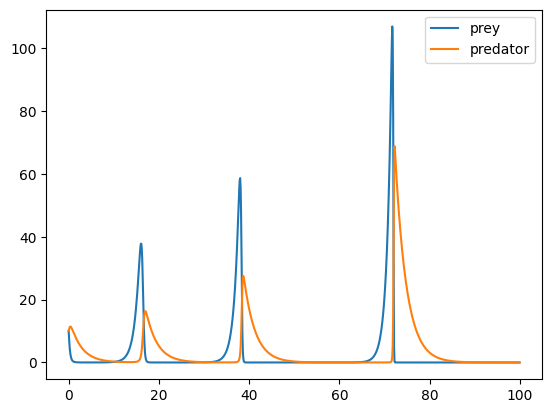

In [1]:
from jitcdde import jitcdde, y, t
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 1.0
beta = 0.4
delta = 0.1
gamma = 0.4
tau = 1.0  # Delay

# Defining the system
def model():
    yield alpha * y(0) - beta * y(0) * y(1)    # dx/dt
    yield delta * y(0,t-tau) * y(1) - gamma * y(1) # dy/dt

# Initialize the JITCDDE object
DDE = jitcdde(model)

# Initial conditions
initial_prey = 10  # Initial number of prey
initial_predator = 10  # Initial number of predators
DDE.constant_past([initial_prey, initial_predator])

# Compiling the DDE
DDE.compile_C()

# Integration
times = np.arange(0, 100, 0.1)
data = np.array([DDE.integrate(time) for time in times])

plt.plot(times,[d[0] for d in data],label="prey")
plt.plot(times,[d[1] for d in data],label="predator")
plt.legend()
